### Online course engagement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook\data/online_course_engagement_data.csv')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [4]:
df.duplicated().sum()

877

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,4504.687185,50.607728,10.148098,5.166933,75.091084,51.190873,0.500431,0.439247
std,2604.220672,28.364184,5.987972,3.132108,14.339876,29.069716,0.500031,0.496326
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2248.500000,26.114631,5.000000,2.000000,62.791226,26.276765,0.000000,0.000000
50%,4492.000000,50.316921,10.000000,5.000000,75.273913,51.581186,1.000000,0.000000
75%,6766.500000,75.377730,15.000000,8.000000,87.497542,76.729629,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [7]:
df.drop('UserID',axis=1,inplace=True)
df.columns = df.columns.str.lower()

#### CourseCategory: Category of the course taken by the user (e.g., Programming, Business, Arts)
#### TimeSpentOnCourse: Total time spent by the user on the course in hours
#### NumberOfVideosWatched: Total number of videos watched by the user
#### NumberOfQuizzesTaken: Total number of quizzes taken by the user
#### QuizScores: Average scores achieved by the user in quizzes (percentage)
#### CompletionRate: Percentage of course content completed by the user
#### DeviceType: Type of device used by the user (Device Type: Desktop (0) or Mobile (1))
#### CourseCompletion (Target Variable): Course completion status (0: Not Completed, 1: Completed)

In [8]:
df.columns


Index(['coursecategory', 'timespentoncourse', 'numberofvideoswatched',
       'numberofquizzestaken', 'quizscores', 'completionrate', 'devicetype',
       'coursecompletion'],
      dtype='object')

#### coursecategory

In [9]:
df.coursecategory.value_counts()

coursecategory
Business       1657
Health         1634
Programming    1633
Science        1629
Arts           1570
Name: count, dtype: int64

Text(0.5, 1.0, 'Coursecategoryr')

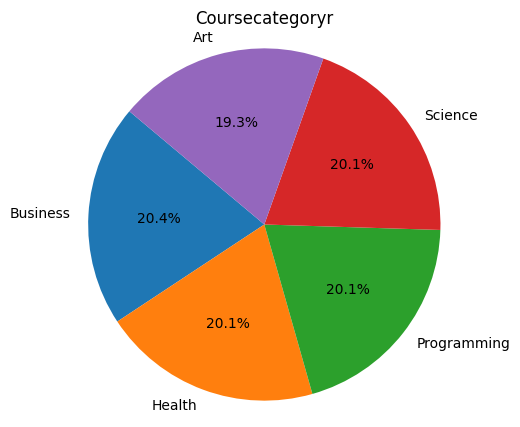

In [10]:
labels = ['Business','Health','Programming','Science','Art']
sizes = df['coursecategory'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Coursecategoryr')

#### timespentoncourse

In [11]:
print(f"Maximum time ever spent on course is {df.timespentoncourse.max()} hrs")
print(f"Minimum time ever spent on course is {df.timespentoncourse.min()} hrs")

Maximum time ever spent on course is 99.99255785648448 hrs
Minimum time ever spent on course is 1.005229866297383 hrs


<Axes: xlabel='timespentoncourse', ylabel='Count'>

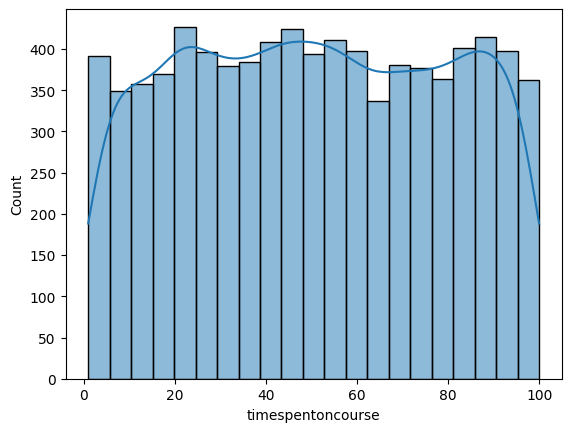

In [12]:
sns.histplot(x=df.timespentoncourse,kde=True)

<Axes: xlabel='timespentoncourse'>

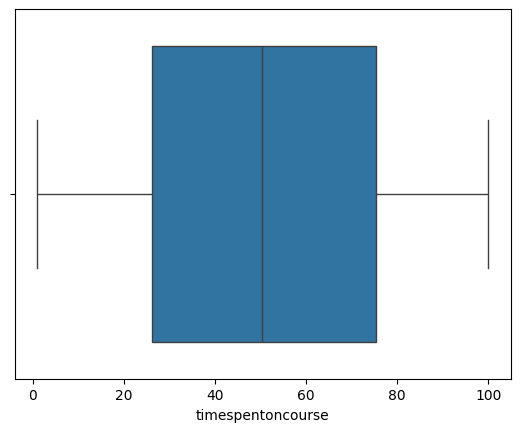

In [13]:
sns.boxplot(x=df.timespentoncourse)

#### numberofvideoswatched

In [14]:
print(f"Maximum number of videos watched is {df.numberofvideoswatched.max()}")
print(f"Minimum number of videos watched is {df.numberofvideoswatched.min()}")

Maximum number of videos watched is 20
Minimum number of videos watched is 0


<Axes: xlabel='numberofvideoswatched', ylabel='Count'>

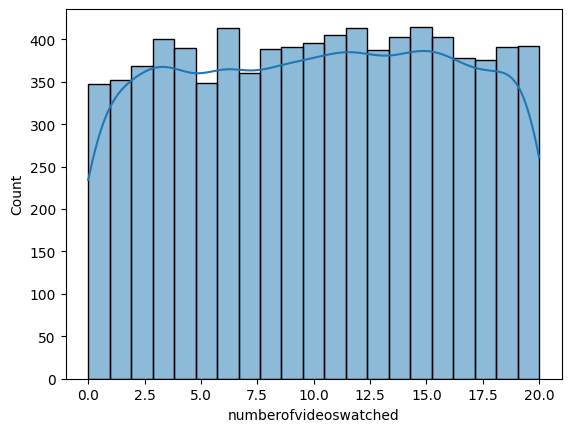

In [15]:
sns.histplot(x=df.numberofvideoswatched,kde=True)

#### numberofquizzestaken

In [16]:
print(f"Maximum number of quizes taken is {df.numberofquizzestaken.max()}")
print(f"Minimum number of quizes taken is {df.numberofquizzestaken.min()}")

Maximum number of quizes taken is 10
Minimum number of quizes taken is 0


#### quizscores

In [17]:
print(f"Maximum score ever achieved is {df.quizscores.max()} %")
print(f"Minimum score ever achieved is {df.quizscores.min()} %")

Maximum score ever achieved is 99.99498421511456 %
Minimum score ever achieved is 50.00511862629234 %


<Axes: xlabel='quizscores', ylabel='Count'>

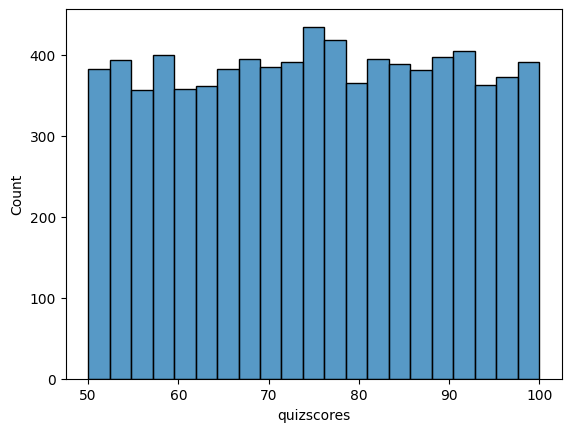

In [18]:
sns.histplot(x=df.quizscores)

#### completionrate

In [19]:
print(f"Highest completetion rate is {df.completionrate.max()} %")
print(f"Lowest completetion rate is {df.completionrate.min()} %")

Highest completetion rate is 99.97971128119624 %
Lowest completetion rate is 0.0093268021242876 %


#### devicetype

In [20]:
df.devicetype.value_counts()

devicetype
1    4065
0    4058
Name: count, dtype: int64

Text(0.5, 1.0, 'Type of Device')

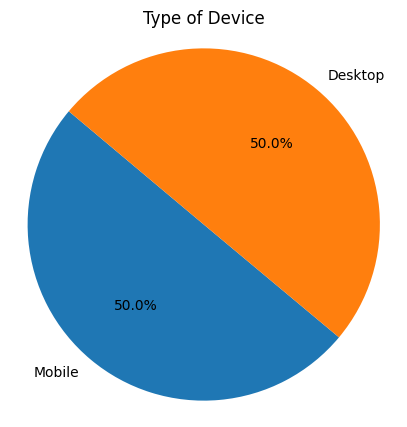

In [21]:
labels = ['Mobile','Desktop']
sizes = df['devicetype'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Type of Device')

#### coursecompletion

In [22]:
df.coursecompletion.value_counts()

coursecompletion
0    4555
1    3568
Name: count, dtype: int64

Text(0.5, 1.0, 'Course Completion')

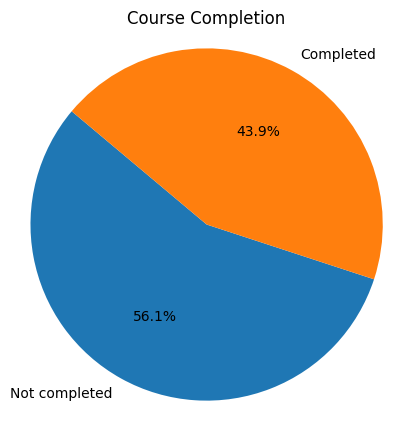

In [23]:
labels = ['Not completed','Completed']
sizes = df['coursecompletion'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Course Completion')

In [24]:
df.head()

,coursecategory,timespentoncourse,numberofvideoswatched,numberofquizzestaken,quizscores,completionrate,devicetype,coursecompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [25]:
df['coursecategory'] = df['coursecategory'].map({
    'Business':0,
    'Health':1,
    'Programming':2,
    'Science':3,
    'Arts':4
})

In [26]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [27]:
X = df.drop('coursecompletion',axis=1)
y = df['coursecompletion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [29]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Learning rate set to 0.022286
0:	learn: 0.6644715	total: 591ms	remaining: 9m 50s
1:	learn: 0.6354617	total: 614ms	remaining: 5m 6s
2:	learn: 0.6089931	total: 628ms	remaining: 3m 28s
3:	learn: 0.5837350	total: 639ms	remaining: 2m 39s
4:	learn: 0.5625765	total: 651ms	remaining: 2m 9s
5:	learn: 0.5398530	total: 665ms	remaining: 1m 50s
6:	learn: 0.5188308	total: 678ms	remaining: 1m 36s
7:	learn: 0.5008968	total: 685ms	remaining: 1m 24s
8:	learn: 0.4807873	total: 693ms	remaining: 1m 16s
9:	learn: 0.4632869	total: 699ms	remaining: 1m 9s
10:	learn: 0.4480328	total: 707ms	remaining: 1m 3s
11:	learn: 0.4319432	total: 712ms	remaining: 58.6s
12:	learn: 0.4167202	total: 718ms	remaining: 54.5s
13:	learn: 0.4026543	total: 725ms	remaining: 51s
14:	learn: 0.3901058	total: 730ms	remaining: 47.9s
15:	learn: 0.3784224	total: 735ms	remaining: 45.2s
16:	learn: 0.3658387	total: 742ms	remaining: 42.9s
17:	learn: 0.3552822	total: 747ms	remaining: 40.7s
18:	learn: 0.3448060	total: 754ms	remaining: 38.9s
19:	le

In [30]:
df.head()

,coursecategory,timespentoncourse,numberofvideoswatched,numberofquizzestaken,quizscores,completionrate,devicetype,coursecompletion
0,1,29.979719,17,3,50.365656,20.860773,1,0
1,4,27.802640,1,5,62.615970,65.632415,1,0
2,4,86.820485,14,2,78.458962,63.812007,1,1
3,3,35.038427,17,10,59.198853,95.433162,0,1
4,2,92.490647,16,0,98.428285,18.102478,0,0


In [31]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/processed_df.csv',index=False)